# Bitcoin, Ethereum News Headlines Sentiment Analysis, Tokenization, WordCloud and NER

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [24]:
# Initial imports
import os
import numpy as np
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline
load_dotenv()

True

#### Fetch the API Key, Initialize News API Client

In [25]:
# Read your api key environment variable
news_api_key = os.getenv("NEWS_API_KEY")

In [26]:
# Create a newsapi client
news_api= NewsApiClient(api_key= news_api_key)
news_api

## Section 1- Sentiment Analysis

#### Initizlize the VADER Sentiment

In [27]:
# Download/Update the VADER Lexicon
nltk.download('vader_lexicon')

# # Initialize the VADER sentiment analyzer
analyzer= SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sathe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


#### Fetch the Bitcoin News

In [28]:
# Fetch the Bitcoin news articles
bitcoin_news= news_api.get_everything(q= 'bitcoin', language= 'en', sort_by= 'relevancy')
bitcoin_news['articles'][:2]

[{'source': {'id': 'wired', 'name': 'Wired'},
  'author': 'Timothy B. Lee, Ars Technica',
  'title': 'An Engineer Gets 9 Years for Stealing $10M From Microsoft',
  'description': 'The defendant tried—and failed—to use bitcoin to cover his tracks.',
  'url': 'https://www.wired.com/story/an-engineer-gets-9-years-for-stealing-dollar10m-from-microsoft/',
  'urlToImage': 'https://media.wired.com/photos/5fac6afb446b4639b3d5b8d8/191:100/w_1280,c_limit/Security-Microsoft-1229426260.jpg',
  'publishedAt': '2020-11-12T14:00:00Z',
  'content': "A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]"},
 {'source': {'id': None, 'name': 'Lifehacker.com'},
  'author': 'Mike Winters on Two Cents, shared by Mike Winters to Lifehacker',
  'title': 'Is the New Visa Bitcoin Rewards Card Worth It?',
  'description': 'Visa\xa0has partnered with crypt

#### Fetch the Ethereum News

In [29]:
# Fetch the Ethereum news articles
ethereum_news= news_api.get_everything(q= 'ethereum', language= 'en', sort_by= 'relevancy')
ethereum_news['articles'][:2]

[{'source': {'id': 'engadget', 'name': 'Engadget'},
  'author': 'Karissa Bell',
  'title': 'PayPal now lets all US users buy, sell and hold cryptocurrency',
  'description': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only available to a small subset of PayPal account holders. That’s…',
  'url': 'https://www.engadget.com/paypal-opens-cryptocurrency-all-us-accounts-210541778.html',
  'urlToImage': 'https://o.aolcdn.com/images/dims?resize=1200%2C630&crop=1200%2C630%2C0%2C0&quality=95&image_uri=https%3A%2F%2Fs.yimg.com%2Fos%2Fcreatr-uploaded-images%2F2020-11%2F4e1af080-2528-11eb-bbdf-193e571d142a&client=amp-blogside-v2&signature=22ad23dde6ee3e667a8067a4c39e1962659cec92',
  'publishedAt': '2020-11-12T21:05:41Z',
  'content': 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open

#### List to hold Bitcoin News sentiment scores

In [30]:
# Create a Bitcoin sentiment list
bitcoin_sentiment= []

for article in bitcoin_news['articles']:
    try:
        bitcoin_text= article['content']
        bitcoin_date= article['publishedAt'][:10]
        
        # Calculate the Bitcoin polarity scores
        bitcoin_sentiment_score= analyzer.polarity_scores(bitcoin_text)
        
        compound= bitcoin_sentiment_score['compound']
        positive= bitcoin_sentiment_score['pos']
        negative= bitcoin_sentiment_score['neg']
        neutral= bitcoin_sentiment_score['neu']
        
        # Append the above to bitcoin_sentiment list
        bitcoin_sentiment.append({
            "Date": bitcoin_date,
            "Text": bitcoin_text,
            "Compound": compound,
            "Positive": positive,
            "Negative": negative,
            "Neutral": neutral
        })
    
    except AttributeError:
        pass

#### Bitcoin Sentiment scores dataframe

In [31]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_df= pd.DataFrame(bitcoin_sentiment)

# Reorder the columns
bitcoin_cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
bitcoin_df= bitcoin_df[bitcoin_cols]

bitcoin_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000


#### List to hold Ethereum News sentiment scores

In [32]:
# Create an Ethereum sentiment list
ethereum_sentiment= []

for article in ethereum_news['articles']:
    try:
        ethereum_text= article['content']
        ethereum_date= article['publishedAt'][:10]
        
        # Calculate the Ethereum polarity scores
        ethereum_sentiment_score= analyzer.polarity_scores(ethereum_text)
        
        compound= ethereum_sentiment_score['compound']
        positive= ethereum_sentiment_score['pos']
        negative= ethereum_sentiment_score['neg']
        neutral= ethereum_sentiment_score['neu']
        
        # Append the above to bitcoin_sentiment list
        ethereum_sentiment.append({
            "Date": ethereum_date,
            "Text": ethereum_text,
            "Compound": compound,
            "Positive": positive,
            "Negative": negative,
            "Neutral": neutral
        })
    
    except AttributeError:
        pass

#### Ethereum sentiment scores dataframe

In [33]:
# Create the ethereum sentiment scores DataFrame
ethereum_df= pd.DataFrame(ethereum_sentiment)

# Reorder the columns
ethereum_cols = ["Date", "Text", "Compound", "Positive", "Negative", "Neutral"]
ethereum_df= ethereum_df[ethereum_cols]

ethereum_df.head()

,Date,Text,Compound,Positive,Negative,Neutral
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948


#### Bitcoin summary statistics

In [34]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,19.000000,19.000000,19.000000,19.000000
mean,0.119611,0.060526,0.029000,0.910421
std,0.391383,0.065557,0.066381,0.096570
min,-0.670500,0.000000,0.000000,0.716000
25%,0.000000,0.000000,0.000000,0.833500
50%,0.000000,0.050000,0.000000,0.947000
75%,0.411700,0.102500,0.000000,1.000000
max,0.765000,0.174000,0.215000,1.000000


#### Ethereum summary statistics

In [35]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.151905,0.061600,0.016800,0.921600
std,0.322903,0.078815,0.052501,0.103898
min,-0.493900,0.000000,0.000000,0.672000
25%,0.000000,0.000000,0.000000,0.881500
50%,0.000000,0.052000,0.000000,0.948000
75%,0.406800,0.095250,0.000000,1.000000
max,0.877900,0.318000,0.196000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## Section 2- Tokenization

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [36]:
# Importing the Libraries and Functions
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
# Instantiate the lemmatizer
lemmatizer= WordNetLemmatizer()

#### Tokenizer Master function

In [38]:
# Define the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the stop words
    stop_words= set (stopwords.words('english'))
   
    # Remove the punctuation and substitute
    non_alpha= re.compile('[^a-zA-Z ]')
    re_clean= non_alpha.sub('', str (text))
    
    # Tokenize the words
    words= word_tokenize(re_clean)
    
    # Lemmatize Article words into root words
    root_words= []
    for values in words:
        root_words.append(lemmatizer.lemmatize(values))
        
    # Remove stop words and Convert the words to lowercase
    tokens= []
    for all_words in root_words:
        if all_words.lower() not in stop_words:
            tokens.append(all_words.lower())
    
    return tokens

### Tokenizing all the Bitcoin article words and Merging with the bitcoin_df

In [39]:
# List to hold the tokenized words
bitcoin_non_stop= []
for column_data in bitcoin_df['Text']:
     bitcoin_non_stop.append (set(tokenizer(column_data)))
        
print (bitcoin_non_stop[:5])

[{'microsoft', 'former', 'million', 'credit', 'store', 'microsofts', 'volod', 'nine', 'engineer', 'prison', 'software', 'char', 'stealing', 'ha', 'online', 'year', 'sentenced', 'ukraine'}, {'cryptocurrency', 'unless', 'credit', 'blockfi', 'extremely', 'char', 'pay', 'visahas', 'cash', 'bullish', 'offer', 'bitcoin', 'rather', 'reward', 'first', 'worth', 'youre', 'partnered', 'startup', 'applying', 'card'}, {'cryptocurrency', 'newlyannounced', 'support', 'bringing', 'paypal', 'account', 'announced', 'us', 'plan', 'char', 'trading', 'user', 'open', 'usbased', 'wa', 'first', 'october'}, {'time', 'soared', 'rally', 'passed', 'next', 'even', 'massive', 'roug', 'higher', 'bitcoin', 'twomonth', 'reaching', 'price', 'char', 'november', 'day', 'absolutely', 'first'}, {'conventional', 'bank', 'theory', 'country', 'cryptocurrencies', 'char', 'digital', 'central', 'unlike', 'china', 'peoples', 'yuan', 'power', 'case', 'stability', 'control', 'give', 'freq', 'move'}]


In [40]:
# Converting the above list to a Numpy array
bitcoin_non_stop_array= pd.DataFrame.from_dict(bitcoin_non_stop).values
bitcoin_non_stop_array[:5]

array([['microsoft', 'former', 'million', 'credit', 'store',
        'microsofts', 'volod', 'nine', 'engineer', 'prison', 'software',
        'char', 'stealing', 'ha', 'online', 'year', 'sentenced',
        'ukraine', None, None, None, None, None],
       ['cryptocurrency', 'unless', 'credit', 'blockfi', 'extremely',
        'char', 'pay', 'visahas', 'cash', 'bullish', 'offer', 'bitcoin',
        'rather', 'reward', 'first', 'worth', 'youre', 'partnered',
        'startup', 'applying', 'card', None, None],
       ['cryptocurrency', 'newlyannounced', 'support', 'bringing',
        'paypal', 'account', 'announced', 'us', 'plan', 'char',
        'trading', 'user', 'open', 'usbased', 'wa', 'first', 'october',
        None, None, None, None, None, None],
       ['time', 'soared', 'rally', 'passed', 'next', 'even', 'massive',
        'roug', 'higher', 'bitcoin', 'twomonth', 'reaching', 'price',
        'char', 'november', 'day', 'absolutely', 'first', None, None,
        None, None, None],
 

In [41]:
# Convert the Numpy array to a DF
bitcoin_non_stop_df= pd.DataFrame(
    list (zip (bitcoin_non_stop_array)),
    columns= ['bitcoin_token']
         )
bitcoin_non_stop_df.head()

,bitcoin_token
0,"[microsoft, former, million, credit, store, mi..."
1,"[cryptocurrency, unless, credit, blockfi, extr..."
2,"[cryptocurrency, newlyannounced, support, brin..."
3,"[time, soared, rally, passed, next, even, mass..."
4,"[conventional, bank, theory, country, cryptocu..."


#### Merge the tokenized DF column with bitcoin_df

In [42]:
# Concatenate the above column
bitcoin_df= pd.concat([bitcoin_df, bitcoin_non_stop_df], axis= 1)
bitcoin_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,bitcoin_token
0,2020-11-12,A former Microsoft software engineer from Ukra...,-0.6705,0.064,0.199,0.737,"[microsoft, former, million, credit, store, mi..."
1,2020-12-03,Visa has partnered with cryptocurrency startup...,0.6369,0.162,0.000,0.838,"[cryptocurrency, unless, credit, blockfi, extr..."
2,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.000,0.947,"[cryptocurrency, newlyannounced, support, brin..."
3,2020-11-20,"In November 2017, after an absolutely massive,...",0.2023,0.050,0.000,0.950,"[time, soared, rally, passed, next, even, mass..."
4,2020-12-06,"Unlike ‘conventional’ cryptocurrencies, a cent...",0.0000,0.000,0.000,1.000,"[conventional, bank, theory, country, cryptocu..."


### Tokenizing all the Ethereum article words and Merging with the ethereum_df

In [43]:
# List to hold the tokenized words
ethereum_non_stop= []
for column_data in ethereum_df['Text']:
     ethereum_non_stop.append (set (tokenizer(column_data)))
        
print (ethereum_non_stop[:5])

[{'cryptocurrency', 'newlyannounced', 'support', 'bringing', 'paypal', 'account', 'announced', 'us', 'plan', 'char', 'trading', 'user', 'open', 'usbased', 'wa', 'first', 'october'}, {'photo', 'standing', 'pc', 'representation', 'february', 'illustration', 'file', 'ruvicillustrationlondon', 'reutersdado', 'motherboard', 'picture', 'seen', 'virtual', 'char', 'currency', 'reuters', 'ethereum'}, {'soared', 'representation', 'gaining', 'xrp', 'virtual', 'char', 'monday', 'momentum', 'reuters', 'ethereum', 'digital', 'highfile', 'powered', 'bitcoin', 'towards', 'london', 'photo', 'alltime', 'currency'}, {'photo', 'standing', 'pc', 'representation', 'february', 'illustration', 'file', 'ruvicillustrationlondon', 'reutersdado', 'motherboard', 'picture', 'seen', 'virtual', 'char', 'currency', 'reuters', 'ethereum'}, {'cryptocurrency', 'institutional', 'million', 'ended', 'highest', 'char', 'reuters', 'record', 'second', 'asset', 'manag', 'sector', 'pushing', 'dec', 'fund', 'york', 'investor', 'p

In [44]:
# Converting the above list to a Numpy array
ethereum_non_stop_array= pd.DataFrame.from_dict(ethereum_non_stop).values
ethereum_non_stop_array[:5]

array([['cryptocurrency', 'newlyannounced', 'support', 'bringing',
        'paypal', 'account', 'announced', 'us', 'plan', 'char',
        'trading', 'user', 'open', 'usbased', 'wa', 'first', 'october',
        None, None, None, None, None],
       ['photo', 'standing', 'pc', 'representation', 'february',
        'illustration', 'file', 'ruvicillustrationlondon', 'reutersdado',
        'motherboard', 'picture', 'seen', 'virtual', 'char', 'currency',
        'reuters', 'ethereum', None, None, None, None, None],
       ['soared', 'representation', 'gaining', 'xrp', 'virtual', 'char',
        'monday', 'momentum', 'reuters', 'ethereum', 'digital',
        'highfile', 'powered', 'bitcoin', 'towards', 'london', 'photo',
        'alltime', 'currency', None, None, None],
       ['photo', 'standing', 'pc', 'representation', 'february',
        'illustration', 'file', 'ruvicillustrationlondon', 'reutersdado',
        'motherboard', 'picture', 'seen', 'virtual', 'char', 'currency',
        'reut

In [45]:
# Convert the Numpy array to a DF
ethereum_non_stop_df= pd.DataFrame(
    list (zip (ethereum_non_stop_array)),
    columns= ['ethereum_token']
         )
ethereum_non_stop_df.head()

,ethereum_token
0,"[cryptocurrency, newlyannounced, support, brin..."
1,"[photo, standing, pc, representation, february..."
2,"[soared, representation, gaining, xrp, virtual..."
3,"[photo, standing, pc, representation, february..."
4,"[cryptocurrency, institutional, million, ended..."


#### Merge the tokenized DF column with ethereum_df

In [46]:
# Concatenate the above column
ethereum_df= pd.concat([ethereum_df, ethereum_non_stop_df], axis= 1)
ethereum_df.head()

,Date,Text,Compound,Positive,Negative,Neutral,ethereum_token
0,2020-11-12,PayPal is bringing its newly-announced support...,0.2144,0.053,0.0,0.947,"[cryptocurrency, newlyannounced, support, brin..."
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[photo, standing, pc, representation, february..."
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912,"[soared, representation, gaining, xrp, virtual..."
3,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[photo, standing, pc, representation, february..."
4,2020-12-07,NEW YORK (Reuters) - Institutional investors p...,0.1779,0.052,0.0,0.948,"[cryptocurrency, institutional, million, ended..."


---

## Section 3- NGrams, Frequency Analysis, WordCloud

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [47]:
# Import the Libraries and functions
from collections import Counter
from nltk import ngrams

### Bitcoin NGrams

In [48]:
# Convert the tokenized words to a string and embed in a list
bitcoin_words= tokenizer(''.join (str (bitcoin_df['bitcoin_token'].to_list())))
bitcoin_words[:10]

['arraymicrosoft',
 'former',
 'million',
 'credit',
 'store',
 'microsofts',
 'volod',
 'nine',
 'engineer',
 'prison']

In [49]:
# Generate the Bitcoin N-grams where N=2
# The first two elements are not relevant. Retreive the top 12 bigrams and drop the first two elements
bitcoin_ngrams= (pd.Series (nltk.ngrams (bitcoin_words, 2)).value_counts())[:12]
bitcoin_ngrams

(none, none)                          60
(none, dtypeobject)                   18
(dtypeobject, arrayphoto)              4
(bitcoin, reutersdado)                 4
(dtypeobject, arraycryptocurrency)     3
(taken, reuters)                       3
(representation, virtual)              3
(virtual, char)                        3
(arrayphoto, stafffile)                3
(char, monday)                         2
(currency, taken)                      2
(may, bitcoin)                         2
dtype: int64

In [50]:
# Get the top 10 ngrams for Bitcoin
bitcoin_ngrams_top10= bitcoin_ngrams[2:]
bitcoin_ngrams_top10

(dtypeobject, arrayphoto)             4
(bitcoin, reutersdado)                4
(dtypeobject, arraycryptocurrency)    3
(taken, reuters)                      3
(representation, virtual)             3
(virtual, char)                       3
(arrayphoto, stafffile)               3
(char, monday)                        2
(currency, taken)                     2
(may, bitcoin)                        2
dtype: int64

In [51]:
# Transform the above tuple to a Dataframe
bitcoin_ngrams_top10_df= pd.DataFrame(
    bitcoin_ngrams_top10,
    columns= ['bitcoin_bigrams']).reset_index()

bitcoin_ngrams_top10_df= bitcoin_ngrams_top10_df.rename(columns= {'index': 'bigrams','bitcoin_bigrams': 'frequency'})
bitcoin_ngrams_top10_df

,bigrams,frequency
0,"(dtypeobject, arrayphoto)",4
1,"(bitcoin, reutersdado)",4
2,"(dtypeobject, arraycryptocurrency)",3
3,"(taken, reuters)",3
4,"(representation, virtual)",3
5,"(virtual, char)",3
6,"(arrayphoto, stafffile)",3
7,"(char, monday)",2
8,"(currency, taken)",2
9,"(may, bitcoin)",2


### Ethereum NGrams

In [52]:
# Convert the tokenized words to a string and embed in a list
ethereum_words= tokenizer(''.join (str (ethereum_df['ethereum_token'].to_list())))
ethereum_words[:10]

['arraycryptocurrency',
 'newlyannounced',
 'support',
 'bringing',
 'paypal',
 'account',
 'announced',
 'u',
 'plan',
 'char']

In [53]:
# Generate the Ethereum N-grams where N=2
# The first two elements are not relevant. Retreive the top 12 bigrams and drop the first two elements
ethereum_ngrams= (pd.Series (nltk.ngrams (ethereum_words, 2)).value_counts())[:12]
ethereum_ngrams

(none, none)                          56
(none, dtypeobject)                   19
(seen, virtual)                        7
(dtypeobject, arrayphoto)              6
(bitcoin, reutersdado)                 6
(representation, illustration)         5
(virtual, november)                    5
(november, currency)                   5
(dtypeobject, arraycryptocurrency)     4
(taken, reuters)                       4
(char, reuters)                        4
(virtual, char)                        4
dtype: int64

In [54]:
# Get the top 10 bigrams for Ethereum
ethereum_ngrams_top10= ethereum_ngrams[2:]
ethereum_ngrams_top10

(seen, virtual)                       7
(dtypeobject, arrayphoto)             6
(bitcoin, reutersdado)                6
(representation, illustration)        5
(virtual, november)                   5
(november, currency)                  5
(dtypeobject, arraycryptocurrency)    4
(taken, reuters)                      4
(char, reuters)                       4
(virtual, char)                       4
dtype: int64

In [55]:
# Transform the above tuple to a Dataframe
ethereum_ngrams_top10_df= pd.DataFrame(
    ethereum_ngrams_top10,
    columns= ['ethereum_bigrams']).reset_index()

ethereum_ngrams_top10_df= ethereum_ngrams_top10_df.rename(columns= {'index': 'bigrams','ethereum_bigrams': 'frequency'})
ethereum_ngrams_top10_df

,bigrams,frequency
0,"(seen, virtual)",7
1,"(dtypeobject, arrayphoto)",6
2,"(bitcoin, reutersdado)",6
3,"(representation, illustration)",5
4,"(virtual, november)",5
5,"(november, currency)",5
6,"(dtypeobject, arraycryptocurrency)",4
7,"(taken, reuters)",4
8,"(char, reuters)",4
9,"(virtual, char)",4


In [56]:
# Use the token_count function to generate the top 10 words from each coin
# def token_count(tokens, N=10):
#     """Returns the top N tokens from the frequency count"""
#     return Counter(tokens).most_common(N)

## Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [57]:
# Import the libraries and functions
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [10.0, 10.0]

#### Bitcoin WordCloud

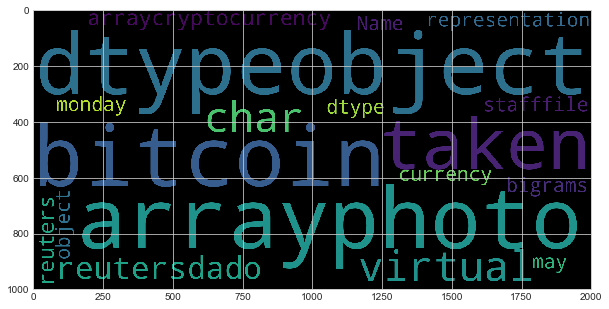

In [61]:
# Generate the Bitcoin word cloud from the top 10 bitcoin bigrams
bitcoin_big_text= ''.join (str (bitcoin_ngrams_top10_df['bigrams']))

bitcoin_wc= WordCloud(width=2000, height=1000).generate(bitcoin_big_text) # title= "Bitcoin WordCloud"
plt.imshow(bitcoin_wc)

#### Ethereum WordCloud

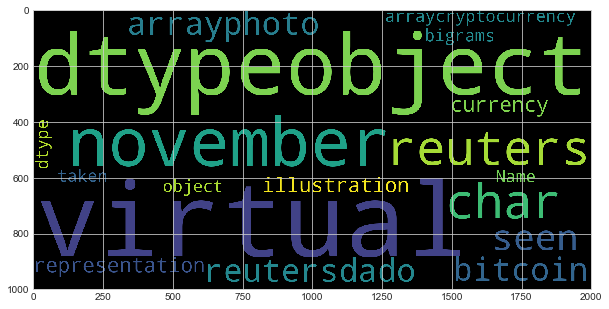

In [80]:
# Generate the Ethereum word cloud from the top 10 ethereum bigrams
ethereum_big_text= ''.join (str (ethereum_ngrams_top10_df['bigrams']))

ethereum_wc= WordCloud(width=2000, height=1000).generate(ethereum_big_text)
plt.imshow(ethereum_wc)

---

## Section 4- Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [64]:
import spacy
from spacy import displacy

In [65]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [66]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [67]:
# Concatenate all of the bitcoin text together
bitcoin_concat= bitcoin_df['Text'].values.tolist()
bitcoin_concat

["A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars]",
 'Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars]',
 'PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]',
 'In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars]',
 'Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China.

In [68]:
# Merging all the bitcoin articles into one big object
bitcoin_joined= ','.join (map (str, bitcoin_concat))
bitcoin_joined

"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars],Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars],PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars],In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars],Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives t

In [69]:
# Run the NER processor on all of the text
bitcoin_ner= nlp(bitcoin_joined)

# Add a title to the document


In [70]:
# Render the visualization
displacy.render(bitcoin_ner, style= 'ent',)

In [72]:
# List all Entities
for ent in bitcoin_ner.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
first ORDINAL
Bitcoin GPE
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
+2490 chars],Decentralized ORG
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
chars],Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
chars],1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bitcoin GPE
March 13,

## Ethereum NER

In [73]:
# Concatenate all of the Ethereum text together
ethereum_concat= ethereum_df['Text'].values.tolist()
ethereum_concat

['PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars]',
 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]',
 'LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars]',
 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]',
 'NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week 

In [74]:
# Merging all the ethereum articles into one big object
ethereum_joined= ','.join (map (str, ethereum_concat))
ethereum_joined

"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars],FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars],LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars],FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars],NEW YORK (Reuters) - Institutional investors pumped $429 million into cryptocurrency funds and products for the week ended Dec. 7, the

In [75]:
# Run the NER processor on all of the text
ethereum_ner= nlp(ethereum_joined)

# Add a title to the document
# YOUR CODE HERE!

In [76]:
# Render the visualization
displacy.render(ethereum_ner, style= 'ent')

In [77]:
# List all Entities
for entity in ethereum_ner.ents:
    print (entity.text, entity.label_)

PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
XRP ORG
Monday DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
chars],NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
chars],NEW YORK PERSON
Reuters ORG
$429 million MONEY
the week ended Dec. 7 DATE
second ORDINAL
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
New York Times ORG
Coinbase ORG
chars],These NORP
early February this year DATE
last month DATE
October DATE
$24 million MONEY
8 DATE
2020 DATE
5 CARDINAL
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
